In [1]:
import numpy as np
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

# Introduction xarrays

This is just to get a quick introduction of the structure of the xarray data type.

In the cell below we generate a xarray with dimensions $(3,3)$ for variable $x$ with coordinates $(10,20)$ and $y$ with coordinates $(1,2,3)$.

In [2]:
data = xr.DataArray(np.random.rand(2, 3), dims=("x", "y"), coords={"x": [10, 20], "y": [1, 2,3]})
data

<xarray.DataArray (x: 2, y: 3)>
array([[0.38523959, 0.76222573, 0.87493694],
       [0.88546519, 0.54575577, 0.05717412]])
Coordinates:
  * x        (x) int32 10 20
  * y        (y) int32 1 2 3

### data.values

Returns the np.random.rand(2, 3) values you defined when generating the xarray.

In [3]:
data.values

array([[0.38523959, 0.76222573, 0.87493694],
       [0.88546519, 0.54575577, 0.05717412]])

### data.dims

Returns the name of the dimensions.

In [4]:
data.dims

('x', 'y')

### data.coords
Returns the coordinates for all axis directions with coordinate names and datatype of the coordinates.

In [5]:
data.coords

Coordinates:
  * x        (x) int32 10 20
  * y        (y) int32 1 2 3

### data.attrs

Returns other attributes in form of a dictionary with you can easily add by generating a new value associated with a new key.

In [6]:
data.attrs["key"] = "value"
data.attrs

{'key': 'value'}

### More on xarray:
[Documentation](http://xarray.pydata.org/en/stable/index.html)
[Tutorials](https://xarray-contrib.github.io/xarray-tutorial/index.html)

# EMC3 data

The prerequisite for this example to work is to have downloaded the file emc3_example.nc and have the libraries specified in this script installed in your enviroment. We recommend using netCDF4 for opening .nc files. The emc3_example.nc can be found and downloaded here: https://gitlab.mpcdf.mpg.de/dave/xemc3-data given that you have acces.

The path specified in the string in the cell below is where you have stored the emc3_example.nc locally on your computer.

In [7]:
import xemc3
local = r"C:\Users\joag\Documents\Notebooks"
path = local + r"\emc3_example.nc"
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:                       (delta_phi: 2, delta_r: 2, delta_theta: 2, index_energy: 221, index_imp: 172, index_neut: 206, index_stream: 233, phi: 36, r: 139, theta: 512)
Coordinates:
    R_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    z_bounds                      (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    phi_bounds                    (phi, delta_phi) float64 ...
Dimensions without coordinates: delta_phi, delta_r, delta_theta, index_energy, index_imp, index_neut, index_stream, phi, r, theta
Data variables: (12/62)
    _plasma_map                   (r, theta, phi) int64 ...
    ne                            (r, theta, phi) float64 ...
    nZ1                           (r, theta, phi) float64 ...
    nZ2                           (r, theta, phi) float64 ...
    nZ3                           (r, theta, phi) float64 ...
    nZ4                           (r, theta, phi) float64 ...
    ...                            ...
    ionization_electron           (index_neut) float64 ...
    ionization_ion                (index_neut) float64 ...
    ionization_moment_fwd         (index_neut) float64 ...
    ionization_moment_bwk         (index_neut) float64 ...
    TOTAL_FLX                     (index_imp) float64 ...
    TOTAL_RAD                     (index_imp) float64 ...

## dataset (ds) explanation

When running the codeline ds on the last line of a cell you get an overview of what the xarray object consist of.

### ds.coords['R_bounds']

R_bounds represents the coordinates of the vertices at the gridcells in the radial direction in the $xy$-plane. Here $R = \sqrt{x^2 + y^2}$.

### ds.coords['z_bounds']
z_bounds represents the coordinates of the vertices of the gridcells in the $z$-direction.

### ds.coords['phi_bounds']
phi_bounds represents the coordinates of the vertices of the gridcells in the $\phi$-direction.

In [8]:
ds.coords['R_bounds'].shape

(139, 512, 36, 2, 2, 2)

In [9]:
ds.coords['z_bounds']

<xarray.DataArray 'z_bounds' (r: 139, theta: 512, phi: 36, delta_r: 2, delta_theta: 2, delta_phi: 2)>
[20496384 values with dtype=float64]
Coordinates:
    R_bounds    (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    z_bounds    (r, theta, phi, delta_r, delta_theta, delta_phi) float64 ...
    phi_bounds  (phi, delta_phi) float64 0.0 0.01745 0.01745 ... 0.6109 0.6283
Dimensions without coordinates: r, theta, phi, delta_r, delta_theta, delta_phi
Attributes:
    units:    m

### Toroidal slice
A toroidal slice is defined as the grid of $(R,z)$-values at a fixed angle $\phi$. The values of the $\phi$-angles used in the W7X grid can be found in the paragraph below and demonstrated in the next cell.

### ds.coords['phi_bounds']
Running the cell below gives you an array of the $\phi$ angles.

In [10]:
ds.coords['phi_bounds']

<xarray.DataArray 'phi_bounds' (phi: 36, delta_phi: 2)>
array([[0.      , 0.017453],
       [0.017453, 0.034907],
       [0.034907, 0.05236 ],
       [0.05236 , 0.069813],
       [0.069813, 0.087266],
       [0.087266, 0.10472 ],
       [0.10472 , 0.122173],
       [0.122173, 0.139626],
       [0.139626, 0.15708 ],
       [0.15708 , 0.174533],
       [0.174533, 0.191986],
       [0.191986, 0.20944 ],
       [0.20944 , 0.226893],
       [0.226893, 0.244346],
       [0.244346, 0.261799],
       [0.261799, 0.279253],
       [0.279253, 0.296706],
       [0.296706, 0.314159],
       [0.314159, 0.331613],
       [0.331613, 0.349066],
       [0.349066, 0.366519],
       [0.366519, 0.383972],
       [0.383972, 0.401426],
       [0.401426, 0.418879],
       [0.418879, 0.436332],
       [0.436332, 0.453786],
       [0.453786, 0.471239],
       [0.471239, 0.488692],
       [0.488692, 0.506145],
       [0.506145, 0.523599],
       [0.523599, 0.541052],
       [0.541052, 0.558505],
       [0.558505, 0.575959],
       [0.575959, 0.593412],
       [0.593412, 0.610865],
       [0.610865, 0.628319]])
Coordinates:
    phi_bounds  (phi, delta_phi) float64 0.0 0.01745 0.01745 ... 0.6109 0.6283
Dimensions without coordinates: phi, delta_phi

## ds.emc3.plot_Rz(key, phi = $\phi$)

The key is given as a string, None is passed as a key if you want to plot the mesh. An example is the angle phi $= \phi$ which is the angle given in radians as floats. 

For this particular example(.nc file) the floats of the angle $\phi$ can be found in the dictionary defined by ds.coords['phi_bounds'] which has 2 dimensions; one for either side of the cell for a given angle $\phi$. There are 36 different values for $\phi$ since the reactor has a five-fold symmetry which is divided in two up-down symmetric parts: $2\cdot 5\cdot 36 = 360^{\circ}$.

In the cells below are some examples of the parameter electron temperature $T_e$ plotted in toroidal slices for phi index $n_{\phi} = [0,18,35]$.

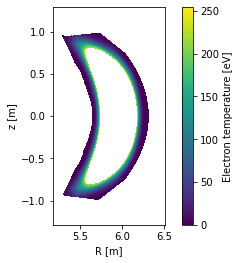

In [11]:
# the parameter can be plotted by a one-liner
ds.emc3.plot_Rz("Te", phi=ds.coords['phi_bounds'][0][0])

In [12]:
# for several angles and control
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
def plot_Te(ip):
    plt.figure(figsize=(20,10))
    ds.emc3.plot_Rz("Te", phi=ip*2*np.pi/360)
ip = widgets.FloatSlider(min = 0, max = 36, value = 0)
interact(plot_Te, ip = ip)

interactive(children=(FloatSlider(value=0.0, description='ip', max=36.0), Output()), _dom_classes=('widget-int…

<function __main__.plot_Te(ip)>

## Preprocessing of gridstructure

The parametervalues are well defined in each gridcell, bat the center or the mean of the vertices of the gridcell: $\mathbf{r}_{param} = \langle \mathbf{r}_{vertex} \rangle$. A simplified analogy is the centerpoint of a 3D cube.

Specifying the dimensions of the mean coordinates by giving ds.direction_bounds.mean(arg) the argument dim=("delta_r", "delta_theta", "delta_phi") you give the mean secify that the mean coordinates the same number of dimensions per axis as the number of cells in each axial direction. 

In [13]:
R = ds.R_bounds.mean(dim=("delta_r", "delta_theta", "delta_phi"))
z = ds.z_bounds.mean(dim=("delta_r", "delta_theta", "delta_phi"))
phi = ds.phi_bounds.mean(dim="delta_phi")
x = R * np.cos(phi)
y = R * np.sin(phi)
x, ds.Te

(<xarray.DataArray (r: 139, theta: 512, phi: 36)>
 array([[[5.90687195, 5.90143282, 5.89057613, ..., 4.27387008,
          4.21925933, 4.16544375],
         [5.90692225, 5.90157835, 5.89081476, ..., 4.27443602,
          4.21980501, 4.16596973],
         [5.90697495, 5.90172636, 5.89105602, ..., 4.27501305,
          4.22036168, 4.16650662],
         ...,
         [5.90673533, 5.90101113, 5.88987631, ..., 4.27223898,
          4.2176884 , 4.1639313 ],
         [5.90677846, 5.90114916, 5.89010684, ..., 4.27277148,
          4.21820095, 4.16442445],
         [5.90682402, 5.90128975, 5.89034014, ..., 4.27331521,
          4.21872462, 4.16492863]],
 
        [[5.88039947, 5.87478717, 5.86353702, ..., 4.22636359,
          4.17204559, 4.11853643],
         [5.88048206, 5.87503477, 5.86394578, ..., 4.22725027,
          4.17290028, 4.11936057],
         [5.88056438, 5.87528231, 5.86435491, ..., 4.22815464,
          4.17377244, 4.12020195],
 ...
         [5.64755073, 5.63505485, 5.61354696, 

## Use of NaN values in the mesh

Not all gridcells have a defined parameter value attached to it. This is mostly the outer and inner region of the machine where the values of many parameter has been left out because this is not the regions where the interesting physics happen.
This is illustrated in the above plot example of the electron temperature $T_e$. In the cell below you can se how large a fraction of the total number of gridpoints the mesh for the electron temperature that has NaN as a value.

In [14]:
n_nans_Te = np.sum(np.isnan(np.asarray(ds.Te)))
print("How many nans in Te field? ", n_nans_Te )
print("Fraction of nans with respect to gridcells ", n_nans_Te/(ds.Te.shape[0]*ds.Te.shape[1]*ds.Te.shape[2]))

How many nans in Te field?  584972
Fraction of nans with respect to gridcells  0.22832202987609912


## Grid

In the cell below there is an interactive plot of the grid. You can use the slider to iterate through all toroidal slices(all $\phi$ angles).

In [15]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
def plot_emc3grid(ip):
    plt.figure(figsize=(15,15))
    ds.emc3.plot_Rz(None, phi=ip)
ip = widgets.FloatSlider(min = 0, max = np.pi/5, value = 0)
interact(plot_emc3grid, ip = ip)

interactive(children=(FloatSlider(value=0.0, description='ip', max=0.6283185307179586), Output()), _dom_classe…

<function __main__.plot_emc3grid(ip)>

## Grid with boundaries

Interactive plot of the grid, here you can use the ipywidget slider to iterate through all toroidal slices,
the rmin and rmax to set the boundaries in r direction, and the zmin and zmax to set the boundaries in z direction.

In [16]:
# find boundaries of the grid
rmin = ds.R_bounds.min()
rmax = ds.R_bounds.max()
zmin = ds.z_bounds.min()
zmax = ds.z_bounds.max()

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
def plot_emc3grid(ip, ir, iz):
    plt.figure(figsize=(10,10))
    ds.emc3.plot_Rz('Te', phi=ds.coords['phi_bounds'][ip][0], Rmin = ir[0], Rmax = ir[1], zmin = iz[0], zmax = iz[1])
ip = widgets.IntSlider(min = 0, max = 35, value = 0)
r_slider = widgets.FloatRangeSlider(min = rmin, max = rmax, value = [rmin,rmin+1], readout_format='.9f')
z_slider = widgets.FloatRangeSlider(min = zmin, max = zmax, value = [zmin,zmin+1], readout_format='.9f')
interact(plot_emc3grid, ip = ip, ir = r_slider, iz = z_slider)

interactive(children=(IntSlider(value=0, description='ip', max=35), FloatRangeSlider(value=(4.2525536399999995…

<function __main__.plot_emc3grid(ip, ir, iz)>

## Periodic boundary conditions for plotting

Naturally the data does not have periodic boundary conditions, which means that the last dataframe would be equal to the first. In the case of emc3 data the periodicity is in the theta direction. For plotting the dimension of the theta grid is increased by one and set to the first values in the theta direction. This is for tha plot to "complete the orbit" in the theta direction for it to be closed. In the cell below the case without periodic boundary conditions is illustrated.

In [17]:
def plot_Te_zoomed(ip):
    fig = plt.figure(figsize = (20,10))
    ax = fig.add_subplot()
    c = plt.pcolormesh(ds.emc3['R_corners'][:, :,ip],
                       ds.emc3['z_corners'][:, :,ip],
                       ds.Te[:, :,ip], cmap = plt.cm.jet, shading = 'auto')
    plt.colorbar(c)
phislider = widgets.IntSlider(min = 0, max = 35)
interact(plot_Te_zoomed, ip = phislider)

interactive(children=(IntSlider(value=0, description='ip', max=35), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_Te_zoomed(ip)>